#Import Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import io

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Read Data

In [2]:
Uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [3]:
Data = pd.read_csv(io.StringIO(Uploaded['kc_house_data.csv'].decode('utf-8')))
Data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#Data Exploration and Visualization

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
Data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
Data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [7]:
Data['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [8]:
Data['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

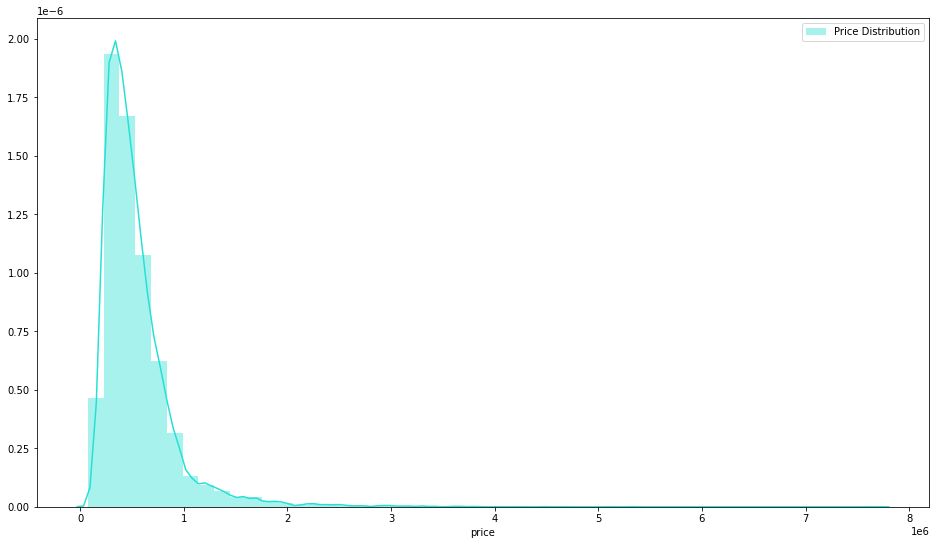

In [9]:
plt.figure(figsize=(16, 9))
sns.distplot(Data['price'],
             color='#26e0d5',
             label='Price Distribution')

plt.legend()
plt.show()

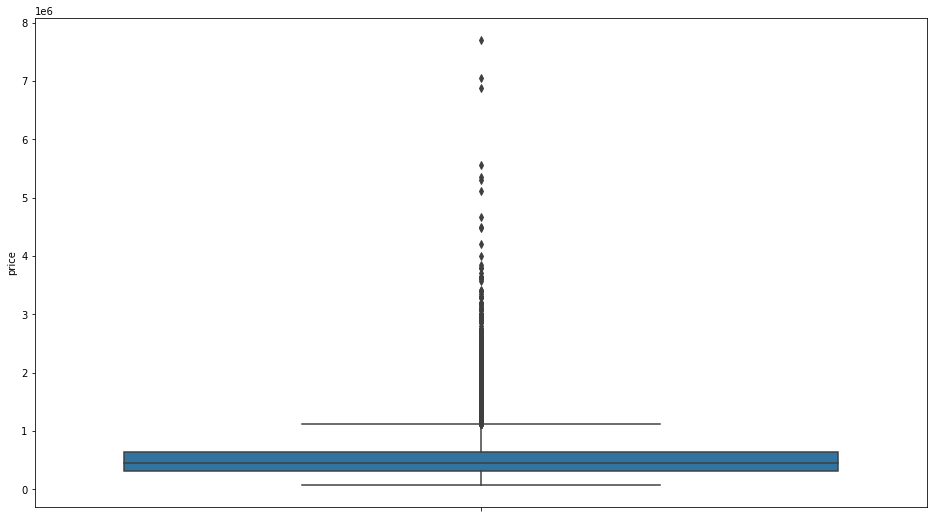

In [10]:
plt.figure(figsize=(16, 9))

sns.boxplot(x='price',
            orient='v',
            data=Data)

plt.show()

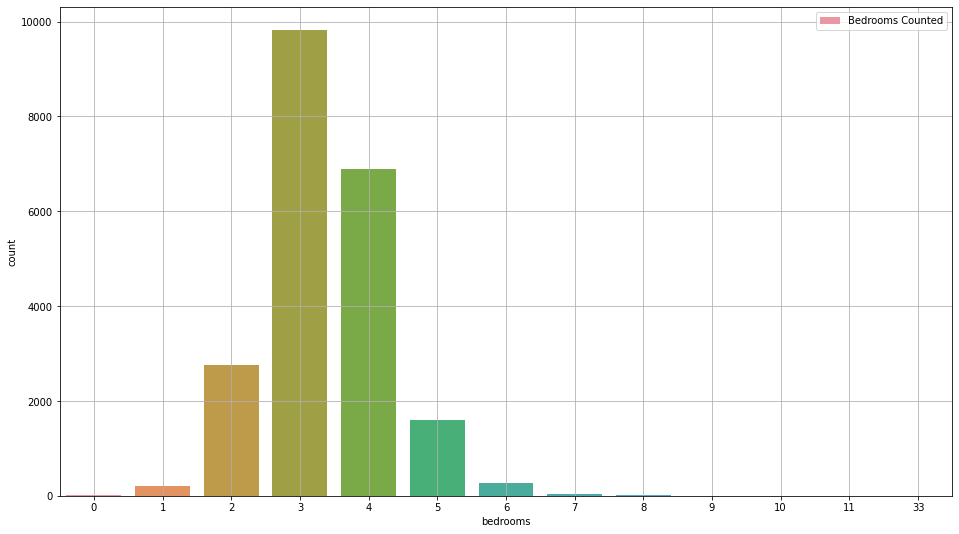

In [11]:
plt.figure(figsize=(16, 9))
sns.countplot(x='bedrooms',
              data=Data,
              label='Bedrooms Counted')
plt.grid()
plt.legend()
plt.show()

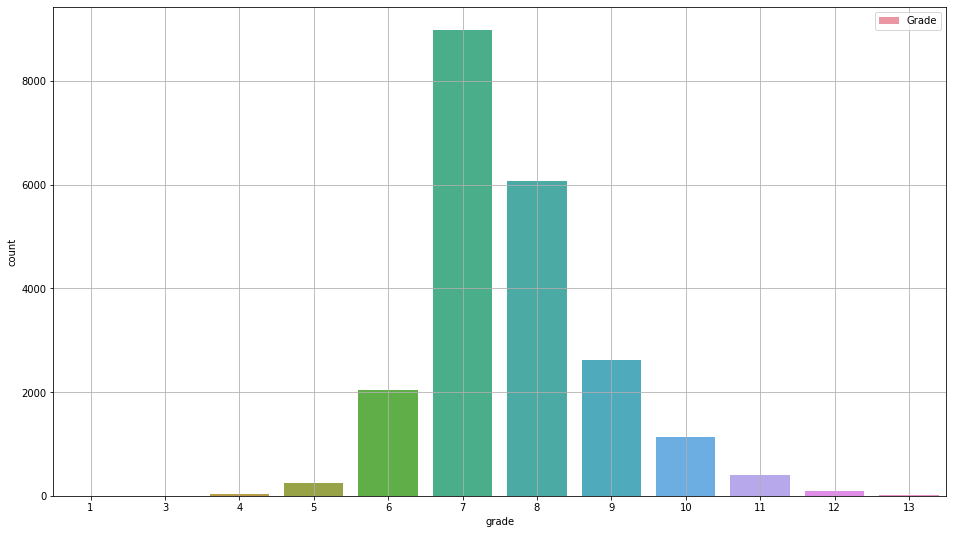

In [12]:
plt.figure(figsize=(16, 9))
sns.countplot(x='grade',
              data=Data,
              label='Grade')
plt.grid()
plt.legend()
plt.show()

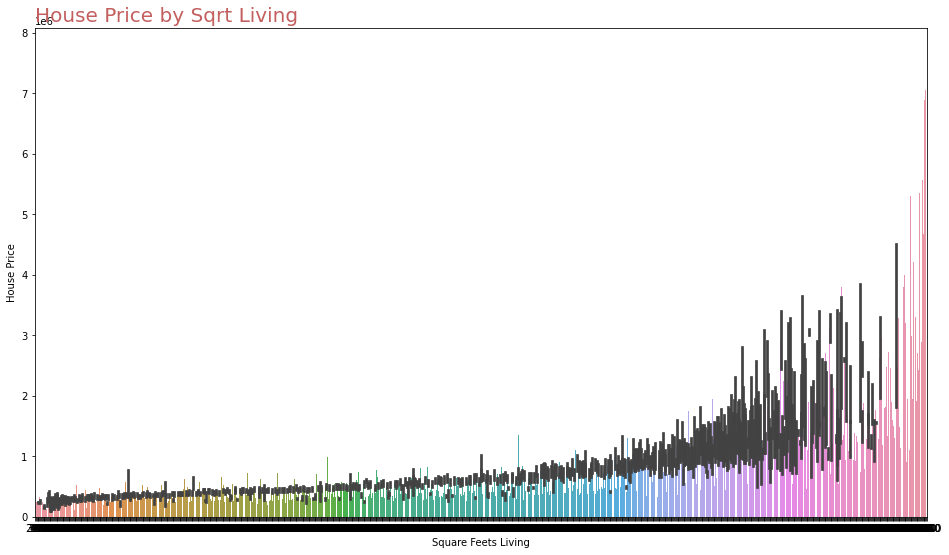

In [13]:
plt.figure(figsize=(16, 9))
sns.barplot(x='sqft_living',
            y='price',
            data=Data)
plt.title('House Price by Sqrt Living',
          loc='left',
          fontsize=20,
          color='#c35f5f')
plt.xlabel('Square Feets Living')
plt.ylabel('House Price')
plt.show()

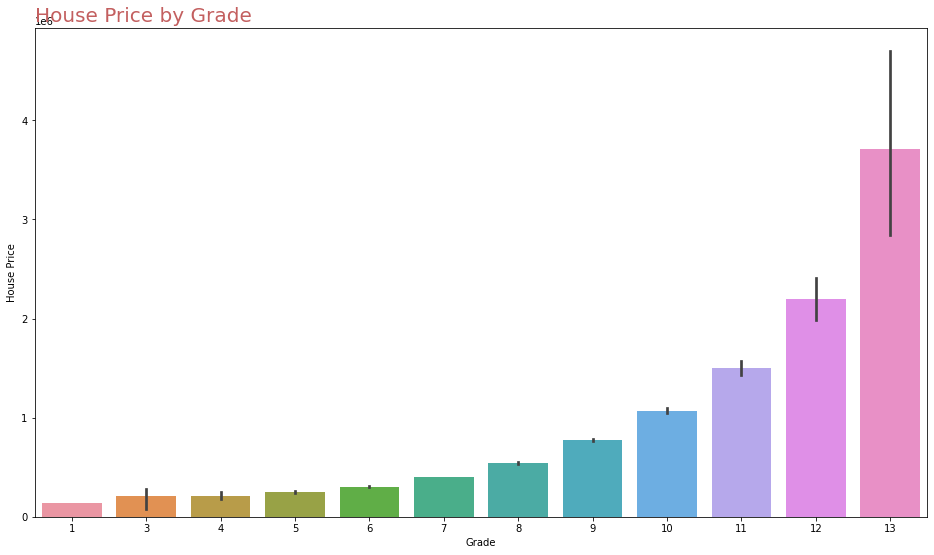

In [14]:
plt.figure(figsize=(16, 9))

sns.barplot(x='grade',
            y='price',
            data=Data)

plt.title('House Price by Grade',
          loc='left',
          fontsize=20,
          color='#c35f5f')
plt.ylabel('House Price')
plt.xlabel('Grade')
plt.show()

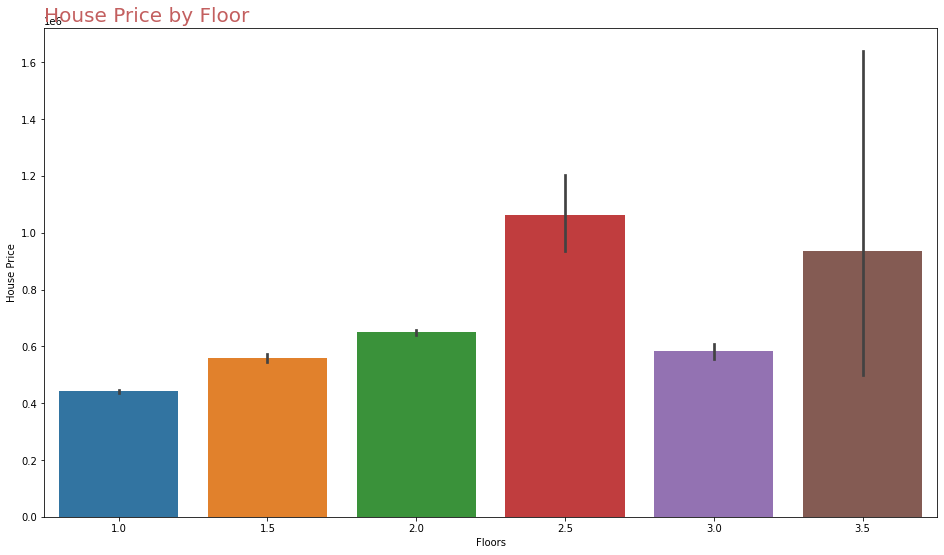

In [15]:
plt.figure(figsize=(16, 9))

sns.barplot(x='floors',
            y='price',
            data=Data)
plt.title('House Price by Floor',
          loc='left',
          color='#c35f5f',
          fontsize=20)
plt.xlabel('Floors')
plt.ylabel('House Price')
plt.show()

In [16]:
Data.groupby(by='floors').mean()['price']

floors
1.0    4.422196e+05
1.5    5.590449e+05
2.0    6.490515e+05
2.5    1.061021e+06
3.0    5.826201e+05
3.5    9.339375e+05
Name: price, dtype: float64

In [17]:
sns.pairplot(Data)

Output hidden; open in https://colab.research.google.com to view.

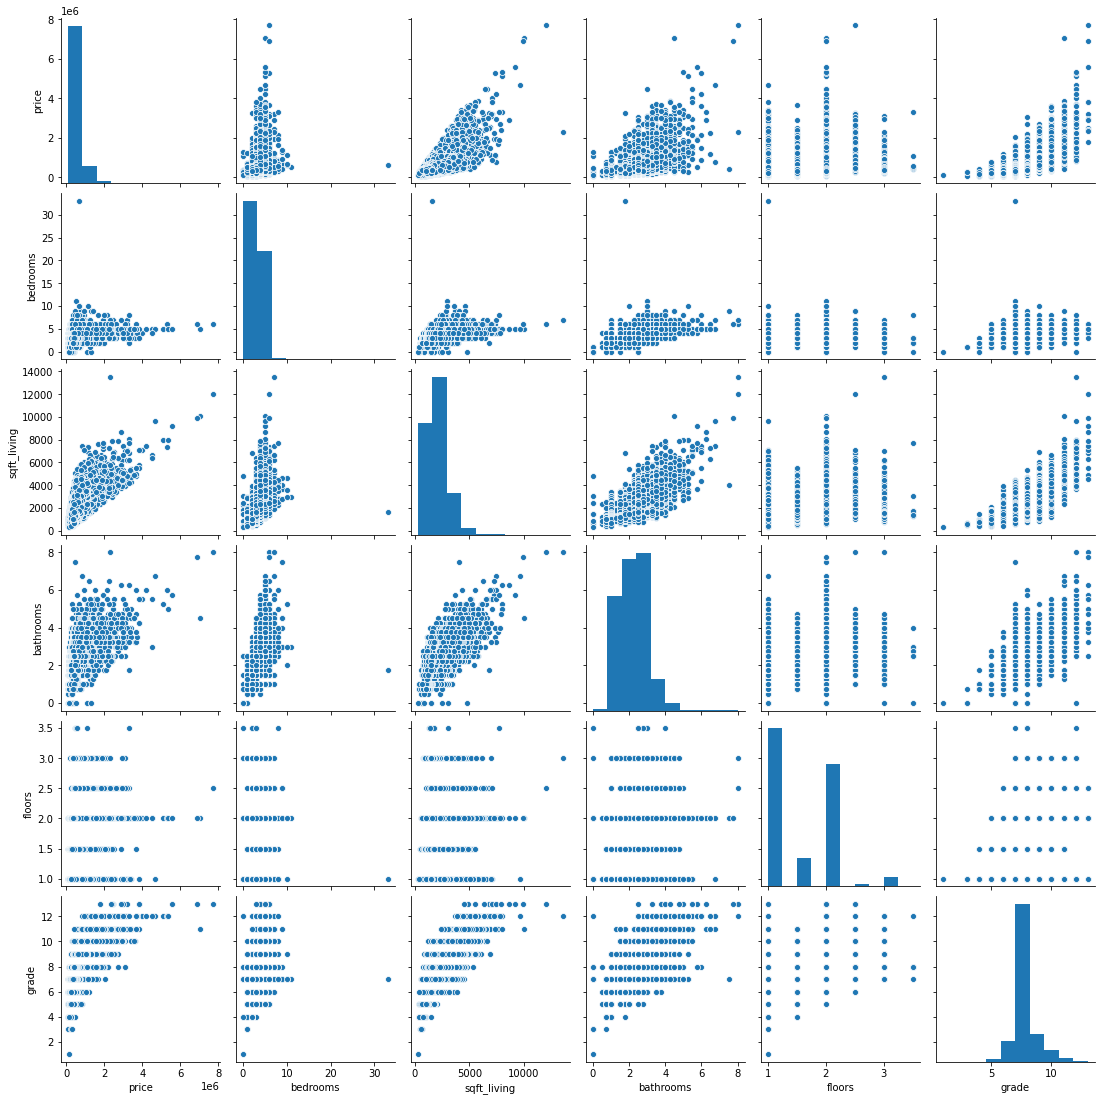

In [22]:
# DCorr = Data[['price', 'bedrooms', 'sqrt_living', 'bathrooms', 'floors', 'sqrt_lot']]
sns.pairplot(Data[['price', 'bedrooms', 'sqft_living', 'bathrooms', 'floors', 'grade']])

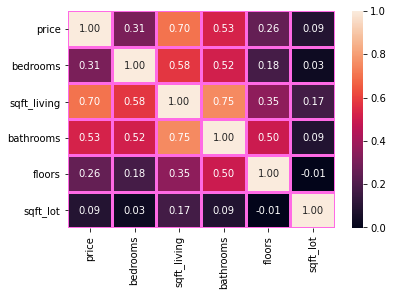

In [36]:
sns.heatmap(Data[['price', 'bedrooms', 'sqft_living', 'bathrooms', 'floors', 'sqft_lot']].corr(),
            annot=True,
            fmt='1.2f',
            linewidth=2,
            linecolor='#ff6ae5'
            )
plt.show()

#Create Model

##Data Split

In [0]:
x = Data['sqft_living']
y= Data['price']

In [0]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    test_size=0.2)

In [45]:
X_Train

9140     2580
13084    2920
18376    1010
15989    1080
15529    3410
         ... 
657       990
15899    1700
17425    1500
16380    1680
9771     2740
Name: sqft_living, Length: 17290, dtype: int64

In [0]:
X_Train = np.array(X_Train).reshape(-1, 1)
X_Test = np.array(X_Test).reshape(-1, 1)
Y_Train = np.array(Y_Train).reshape(-1, 1)
Y_Test = np.array(Y_Test).reshape(-1, 1)

##Model Training

In [50]:
lm = LinearRegression()
lm.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print('Linear Regression Equation is Y = aX + b')
print(f'a or slope = {round(lm.coef_[0][0], 2)}')
print(f'b or intercept = {round(lm.intercept_[0], 2)}')
print(f'ทุกการเพิ่มขึ้น 1 หน่วยของ Sqft Living จะทำให้ Price เพิ่มขึ้น {round(lm.coef_[0][0], 2)} หน่วย')
print(f'b or intercept (จุดตัดแกน Y) ถ้า X = 0, Y = {round(lm.intercept_[0], 2)}')

Linear Regression Equation is Y = aX + b
a or slope = 279.5
b or intercept = -40522.8
ทุกการเพิ่มขึ้น 1 หน่วยของ Sqft Living จะทำให้ Price เพิ่มขึ้น 279.5 หน่วย
b or intercept (จุดตัดแกน Y) ถ้า X = 0, Y = -40522.8


In [58]:
predicted = lm.predict(X_Test)
predicted

array([[1074675.48399229],
       [ 926541.3760445 ],
       [ 429034.37199341],
       ...,
       [ 563193.56409707],
       [1164114.94539474],
       [ 851076.83048619]])

##Compare Predicted with Actual and Error Measurment

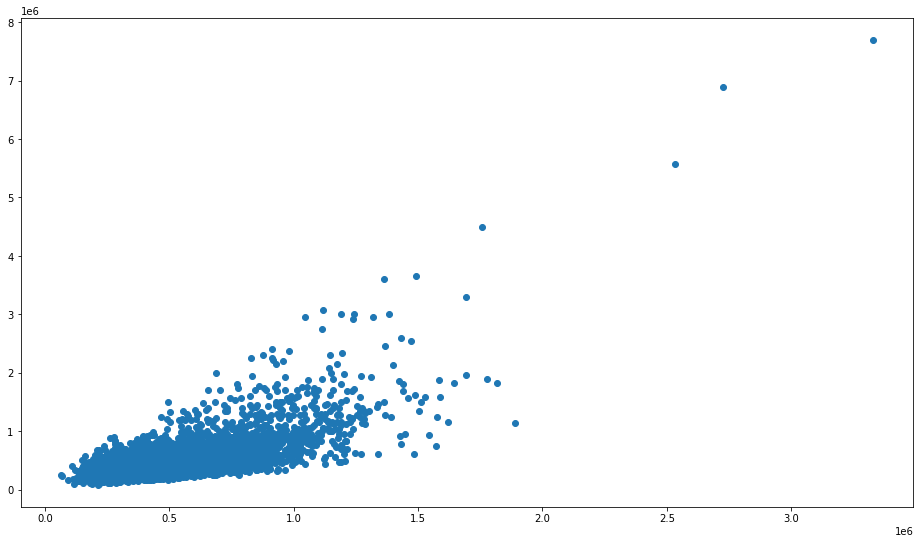

In [65]:
plt.figure(figsize=(16, 9))
plt.scatter(predicted, Y_Test)
plt.show()

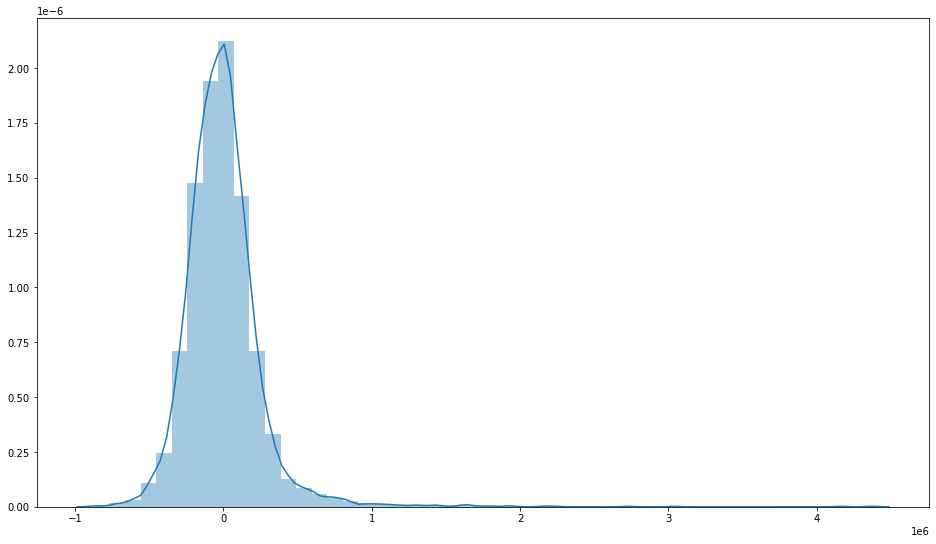

In [66]:
plt.figure(figsize=(16, 9))
sns.distplot((Y_Test-predicted))

In [67]:
metrics.mean_absolute_error(Y_Test,
                            predicted)

172677.74280102114

In [68]:
metrics.mean_squared_error(Y_Test,
                           predicted)

72510877574.6623

In [70]:
np.sqrt(metrics.mean_squared_error(Y_Test,
                           predicted))

269278.4387481892

In [73]:
dict_compare = {'price': Y_Test.tolist(),
                'predicted': predicted.tolist()}

ComparedModel = pd.DataFrame(dict_compare)
ComparedModel.sample(10)

,price,predicted
3662,[950000.0],[574373.4967723796]
4192,[315000.0],[568783.530434727]
1691,[252500.0],[269720.33137030876]
399,[784950.0],[753252.4195772653]
3789,[509900.0],[431829.3551622364]
1982,[425000.0],[280900.2640456141]
2366,[470000.0],[733687.5373954809]
45,[250000.0],[448599.2541751944]
1071,[675000.0],[423444.40565575735]
3636,[470000.0],[518473.8333958528]


In [80]:
print(y.max())
print(x.max())

7700000.0
13540


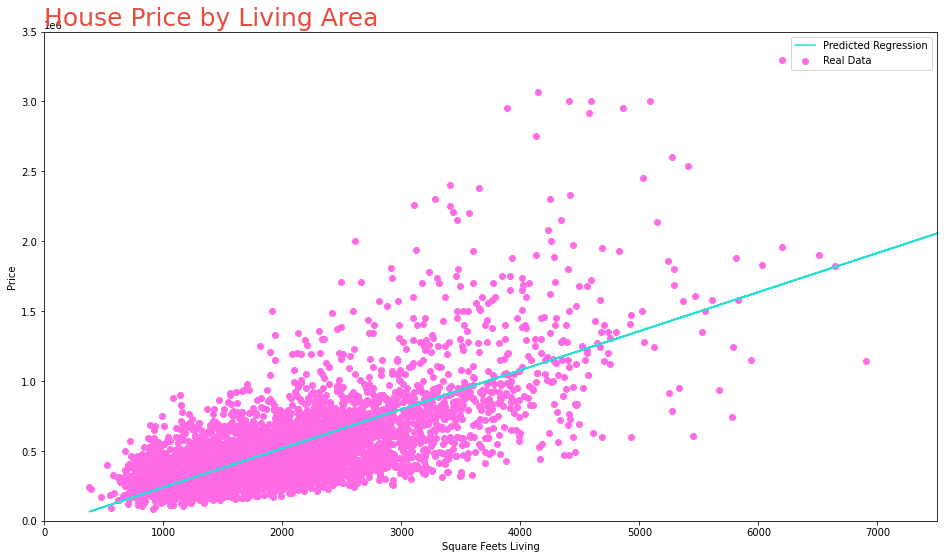

In [82]:
plt.figure(figsize=(16, 9))
plt.scatter(X_Test, Y_Test,
            color='#ff6ae5',
            label='Real Data')
plt.plot(X_Test, predicted,
         color='#26e0d5',
         label='Predicted Regression')
plt.title('House Price by Living Area',
          loc='left',
          fontsize=25,
          color='#e74c3c')
plt.xlabel('Square Feets Living')
plt.ylabel('Price')
plt.xlim([0, 7500])
plt.ylim([0, 3500000])
plt.legend()
plt.show()

#Prediction

In [85]:
area = 500
lm.predict(np.array(area).reshape(-1, 1))

array([[99226.3580719]])

In [89]:
print(f'ถ้าบ้านเรามีขาด {area} ตารางฟุต จะราคาประมาณ {round(lm.predict(np.array(area).reshape(-1, 1))[0][0], 2)} USD')

ถ้าบ้านเรามีขาด 500 ตารางฟุต จะราคาประมาณ 99226.36 USD
